In [13]:
#!/usr/bin/python3
import json
import requests
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import argparse
import datetime as dt

In [124]:
# loading in funding data + formatting

data = pd.read_csv('./Data/funding_fees_raw_d.csv')

data['fundingRate'] = pd.to_numeric(data["fundingRate"], downcast="float")
data['fundingTime'] = pd.to_datetime(data['fundingTime'], unit='ms')

data.index = data.index*8

last_index = len(data['fundingRate'])-1

data = data.groupby(by='symbol')
df = []
for i in data:
    df.append(i)


df


[('BTCUSDT',
        symbol             fundingTime  fundingRate          EWMA
  0    BTCUSDT 2022-02-08 00:00:00.001     0.000100  1.000000e-04
  8    BTCUSDT 2022-02-08 08:00:00.003     0.000100  1.000000e-04
  16   BTCUSDT 2022-02-08 16:00:00.002     0.000100  1.000000e-04
  24   BTCUSDT 2022-02-09 00:00:00.000     0.000082  9.643200e-05
  32   BTCUSDT 2022-02-09 08:00:00.005     0.000058  8.879760e-05
  40   BTCUSDT 2022-02-09 16:00:00.001     0.000051  8.127808e-05
  48   BTCUSDT 2022-02-10 00:00:00.012     0.000100  8.502246e-05
  56   BTCUSDT 2022-02-10 08:00:00.000    -0.000018  6.441997e-05
  64   BTCUSDT 2022-02-10 16:00:00.006     0.000100  7.153598e-05
  72   BTCUSDT 2022-02-11 00:00:00.000     0.000039  6.501878e-05
  80   BTCUSDT 2022-02-11 08:00:00.009    -0.000052  4.153903e-05
  88   BTCUSDT 2022-02-11 16:00:00.015    -0.000076  1.794522e-05
  96   BTCUSDT 2022-02-12 00:00:00.020     0.000100  3.435618e-05
  104  BTCUSDT 2022-02-12 08:00:00.001     0.000100  4.748494e-

In [125]:
# loading in funding data + formatting

data = pd.read_csv('./Data/past_price_hist_raw.csv')

data = data.groupby(by='symbol')
df2 = []
for i in data:
    df2.append(i)


df2

[('BTC',
       Unnamed: 0  index                 time     open     high      low  \
  0             0      0  2022-02-17 12:00:00  43158.3  43347.8  43136.2   
  1             1      1  2022-02-17 12:30:00  43291.4  43337.5  43140.0   
  2             2      2  2022-02-17 13:00:00  43207.4  43288.5  42265.4   
  3             3      3  2022-02-17 13:30:00  42539.1  42674.0  42140.0   
  4             4      4  2022-02-17 14:00:00  42242.3  42384.2  42011.7   
  ..          ...    ...                  ...      ...      ...      ...   
  495         495    495  2022-02-27 19:30:00  38585.7  38619.9  37460.3   
  496         496    496  2022-02-27 20:00:00  37574.7  37840.0  37254.7   
  497         497    497  2022-02-27 20:30:00  37542.2  38300.0  37488.0   
  498         498    498  2022-02-27 21:00:00  37947.0  38021.6  36934.6   
  499         499    499  2022-02-27 21:30:00  37347.6  37696.9  37188.9   
  
         close     volume symbol  
  0    43291.5   6397.092    BTC  
  1   

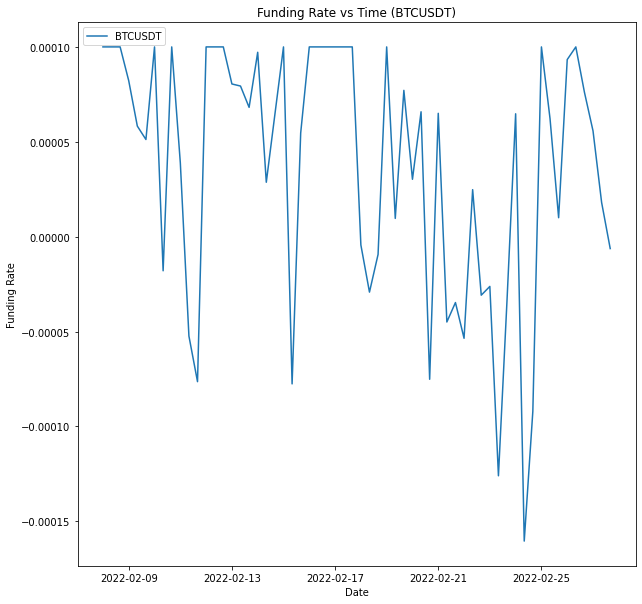

In [126]:
# Plotting BTC data

plt.figure(figsize=(10,10))
plt.plot(df[0][1].fundingTime, df[0][1].fundingRate, label='BTCUSDT')
plt.title('Funding Rate vs Time (BTCUSDT)')
plt.xlabel('Date')
plt.ylabel('Funding Rate')
plt.legend(loc='upper left')
plt.show()

In [127]:
d = df2[0][1].time
d

0      2022-02-17 12:00:00
1      2022-02-17 12:30:00
2      2022-02-17 13:00:00
3      2022-02-17 13:30:00
4      2022-02-17 14:00:00
              ...         
495    2022-02-27 19:30:00
496    2022-02-27 20:00:00
497    2022-02-27 20:30:00
498    2022-02-27 21:00:00
499    2022-02-27 21:30:00
Name: time, Length: 500, dtype: object

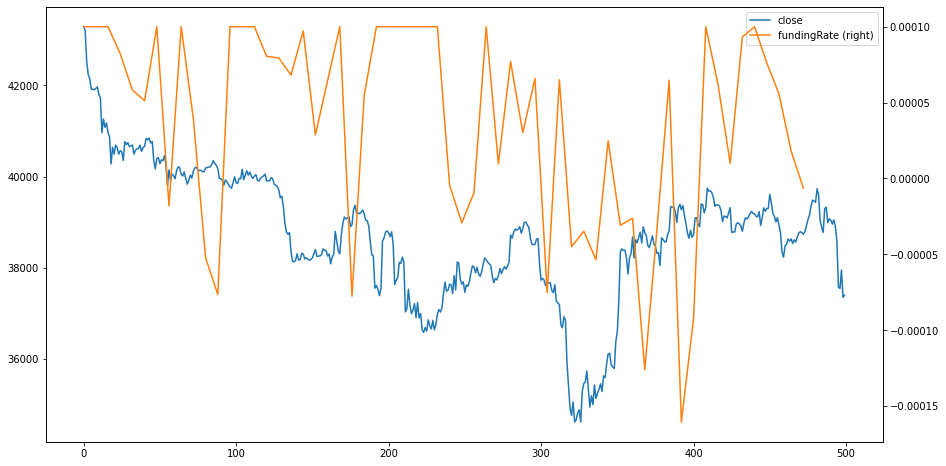

In [128]:
# comparing funding to BTC price
xdata1 = df2[0][1].time
xdata2 = df[0][1].fundingTime

ax=df2[0][1].close.plot(legend=True)
df[0][1].fundingRate.plot(figsize=(15,8),secondary_y=True,ax=ax,legend=True)
plt.show()